# Transformasi Data (Shop Customer Data)
Nama : Azizah Zalfa Assyadida

NPM : 23083010064

Kelas : A-083 (Analisis Data Eksploratif)

## Deskripsi Dataset
Data yang digunakan merupakan analisis terperinci tentang pelanggan ideal sebuah toko imajinatif. Pemilik toko mendapatkan informasi tentang Pelanggan melalui kartu keanggotaan. Data ini dapat membantu bisnis untuk lebih memahami pelanggannya berdasarkan variabel-variabel yang diamati, yakni sebagai berikut:

1. Customer ID : Nomor identifikasi unik pelanggan
2. Gender : Jenis kelamin pelanggan
3. Age : Umur pelanggan
4. Annual Income : Pendapatan pelanggan (dalam USD)
5. Spending Score : Penilaian yang diberikan toko kepada pelanggan, berdasarkan perilaku dan sifat pelanggan saat berkunjung
6. Profession : Pekerjaan pelanggan
7. Work Experience : Pengalaman Pekerjaan Pelanggan (dalam tahun)
8. Family Size : Jumlah anggota keluarga pelanggan

### Melakukan Import Library

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Memanggil dan Menampilkan Dataset

In [6]:
df = pd.read_csv (r'C:\Users\azizah zalfa\OneDrive\Dokumen\Tugas Analisis Data Eksploratif\Shop_Customer_Data.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


Pembacaan data berguna untuk mengetahui segala informasi yang berkaitan dengan data. 

## 1) Missing Value

### Mengecek missing value

In [8]:
np.sum(df.isnull())

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

### Mengatasi missing value

In [9]:
df['Profession'].fillna('None', inplace=True)
np.sum(df.isnull())

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

Setelah melakukan proses pengecekan, diketahui bahwa variabel "Profession" memiliki 35 missing value. Untuk mengatasinya, semua nilai yang hilang dalam kolom "Profession" diisi dengan string 'None'. 

## 2) Outlier

### Menggunakan IQR untuk mengecek outlier 

In [13]:
var_numerik = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']  # Sesuaikan dengan kolom numerik dari data kamu

outliers = {}

for col in var_numerik:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

for col, outlier_data in outliers.items():
    if not outlier_data.empty:
        print(f" - Outlier pada kolom {col}:")
        print(outlier_data)
    else:
        print(f" - Tidak ada outlier pada kolom {col}")


 - Tidak ada outlier pada kolom Age
 - Tidak ada outlier pada kolom Annual Income ($)
 - Tidak ada outlier pada kolom Spending Score (1-100)
 - Outlier pada kolom Work Experience:
392    17
405    17
473    17
566    17
603    17
Name: Work Experience, dtype: int64
 - Tidak ada outlier pada kolom Family Size


Melalui perhitungan IQR diatas, data yang berada di luar batas akan dianggap sebagai outlier. Dan terlihat bahwa variabel Work Experience memiliki outlier yang perlu diatasi.

Sebelum mengatasi outlier yang telah dihitung, ada baiknya kita melakukan visualisasi data dengan boxplot agar memudahkan proses identifikasi terkait keberadaan outlier tersebut.

### Visualisasi variabel numerik untuk melihat data outlier

<Figure size 1400x1000 with 0 Axes>

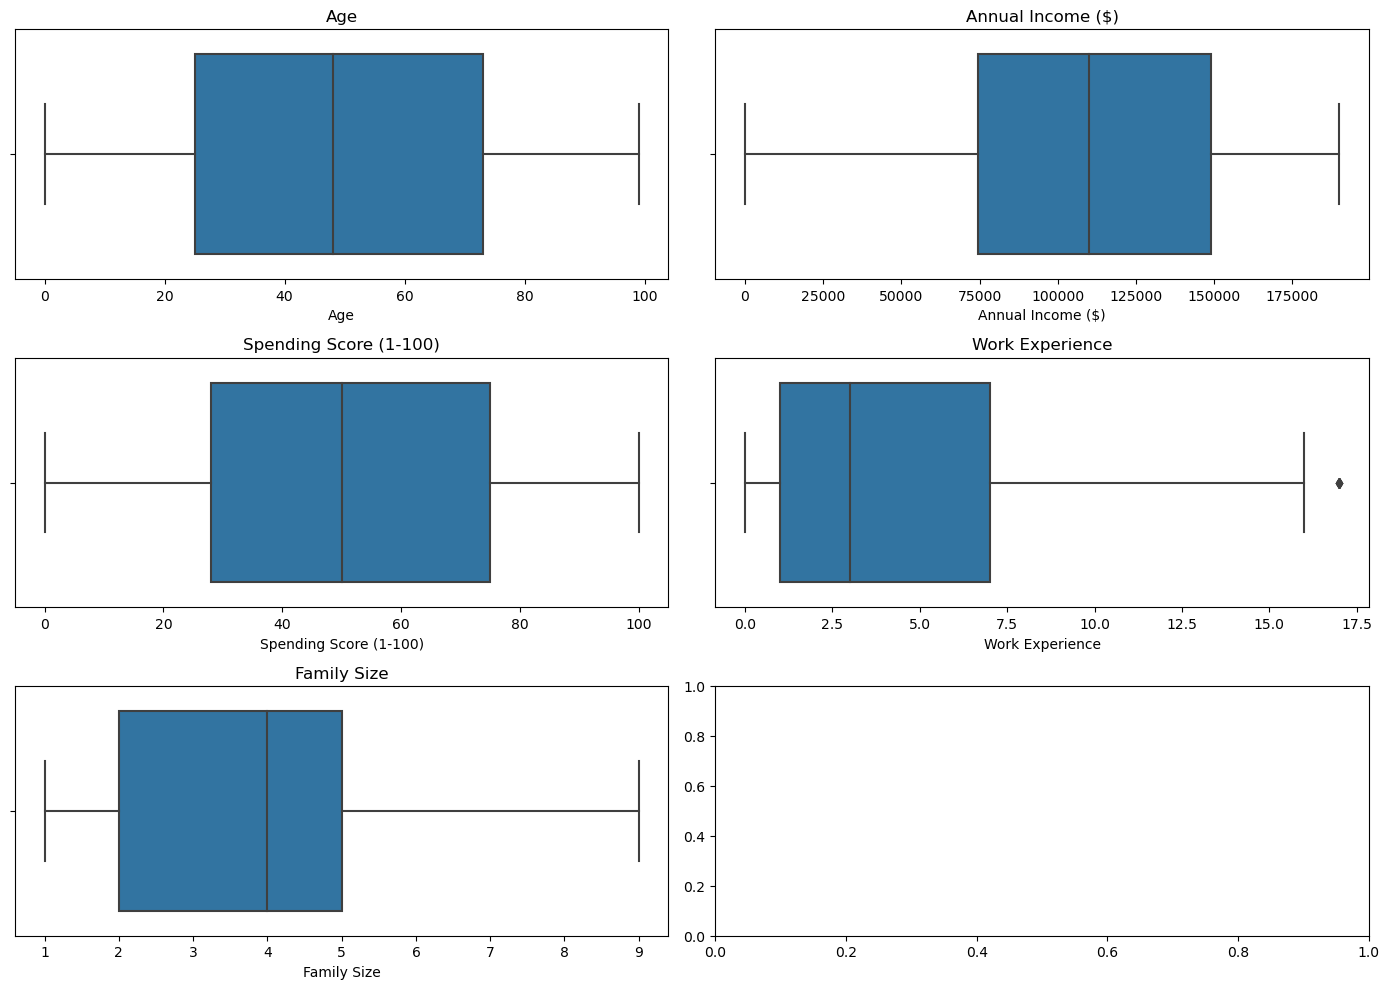

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

feature_index = 0
for i in range(3):
    for j in range(2):
        if feature_index < len(var_numerik):
            sns.boxplot(x=df[var_numerik[feature_index]], ax=axes[i, j], showfliers=True)
            axes[i, j].set_title(var_numerik[feature_index])      
            feature_index += 1

plt.tight_layout()
plt.show()


Berdasarkan visualisasi data diatas, diketahui outlier pada kolom Work Experience terletak di sisi atas yang menunjukkan bahwa beberapa orang telah memiliki pengalaman kerja jauh lebih banyak dibanding yang lain. 

Maka, akan dilakukan metode imputasi pada data dengan memberikan batas pada nilai. Jika nilai lebih rendah maka akan diganti dengan 'batas bawah' dan jika lebih tinggi akan diganti dengan 'batas atas'

### Mengatasi Outlier

In [15]:
var_numerik = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

for col in var_numerik:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("Data setelah outlier dihapus:\n", df)


Data setelah outlier dihapus:
       CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0   

### Menampilkan boxplot setelah outlier diatasi

<Figure size 1400x1000 with 0 Axes>

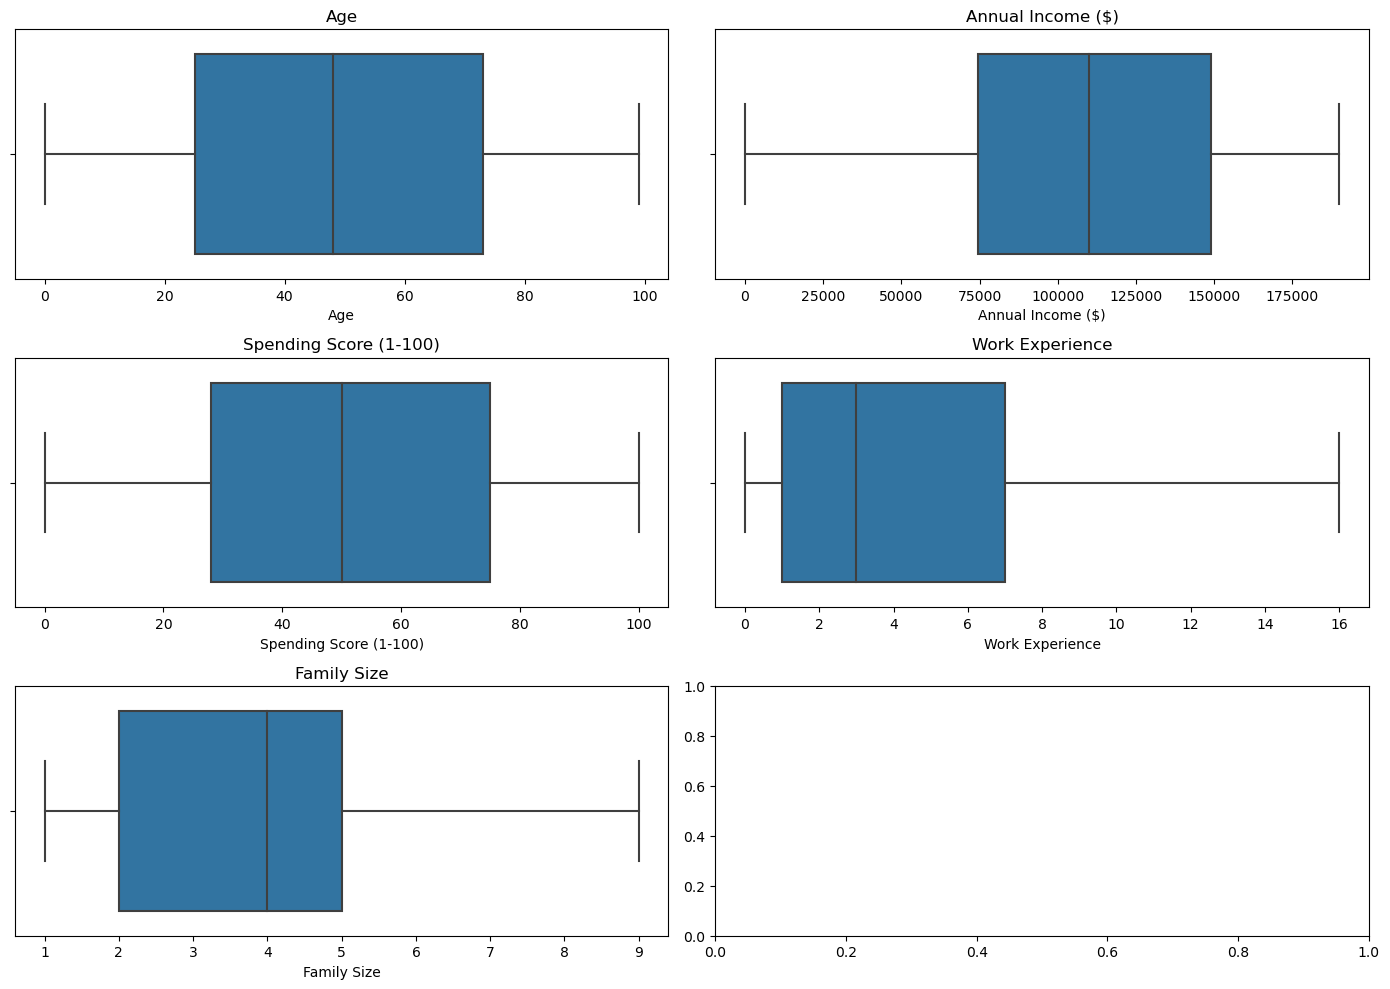

In [16]:
plt.figure(figsize=(14, 10))
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

feature_index = 0
for i in range(3):
    for j in range(2):
        if feature_index < len(var_numerik):
            sns.boxplot(x=df[var_numerik[feature_index]], ax=axes[i, j], showfliers=True)
            axes[i, j].set_title(var_numerik[feature_index])      
            feature_index += 1

plt.tight_layout()
plt.show()

Setelah proses imputasi dilakukan, dapat dilihat bahwa sudah tidak ada lagi outlier pada dataset

## 3) Transformasi Data

### Normalisasi data 

Normalisasi merupakan proses untuk mengubah nilai data sehingga berada dalam rentang [0, 1]

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

var_numerik = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[var_numerik] = scaler_minmax.fit_transform(df[var_numerik])

print("Data setelah normalisasi:\n", df_normalized)

Data setelah normalisasi:
       CustomerID  Gender       Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male  0.191919           0.078958                    0.39   
1              2    Male  0.212121           0.184236                    0.81   
2              3  Female  0.202020           0.452694                    0.06   
3              4  Female  0.232323           0.310569                    0.77   
4              5  Female  0.313131           0.200027                    0.40   
...          ...     ...       ...                ...                     ...   
1995        1996  Female  0.717172           0.970591                    0.40   
1996        1997  Female  0.919192           0.385095                    0.32   
1997        1998    Male  0.878788           0.478808                    0.14   
1998        1999    Male  0.777778           0.958600                    0.04   
1999        2000    Male  0.909091           0.582238                    0.52   



### Standarisasi data

Standarisasi merupakan proses mengubah nilai data sehingga memiliki rata-rata 0 dan deviasi standar 1.

In [18]:
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[var_numerik] = scaler_standard.fit_transform(df[var_numerik])

print("\nData setelah standarisasi:\n", df_standardized)


Data setelah standarisasi:
       CustomerID  Gender       Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male -1.054089          -2.093501               -0.428339   
1              2    Male -0.983723          -1.656133                1.075546   
2              3  Female -1.018906          -0.540845               -1.609962   
3              4  Female -0.913356          -1.131292                0.932319   
4              5  Female -0.631891          -1.590528               -0.392532   
...          ...     ...       ...                ...                     ...   
1995        1996  Female  0.775438           1.610720               -0.392532   
1996        1997  Female  1.479103          -0.821679               -0.678986   
1997        1998    Male  1.338370          -0.432356               -1.323508   
1998        1999    Male  0.986538           1.560904               -1.681576   
1999        2000    Male  1.443919          -0.002664                0.037150   

### Transformasi log

Transformasi log digunakan untuk mengubah data yang memiliki distribusi skewed (miring) menjadi distribusi yang lebih mendekati normal.

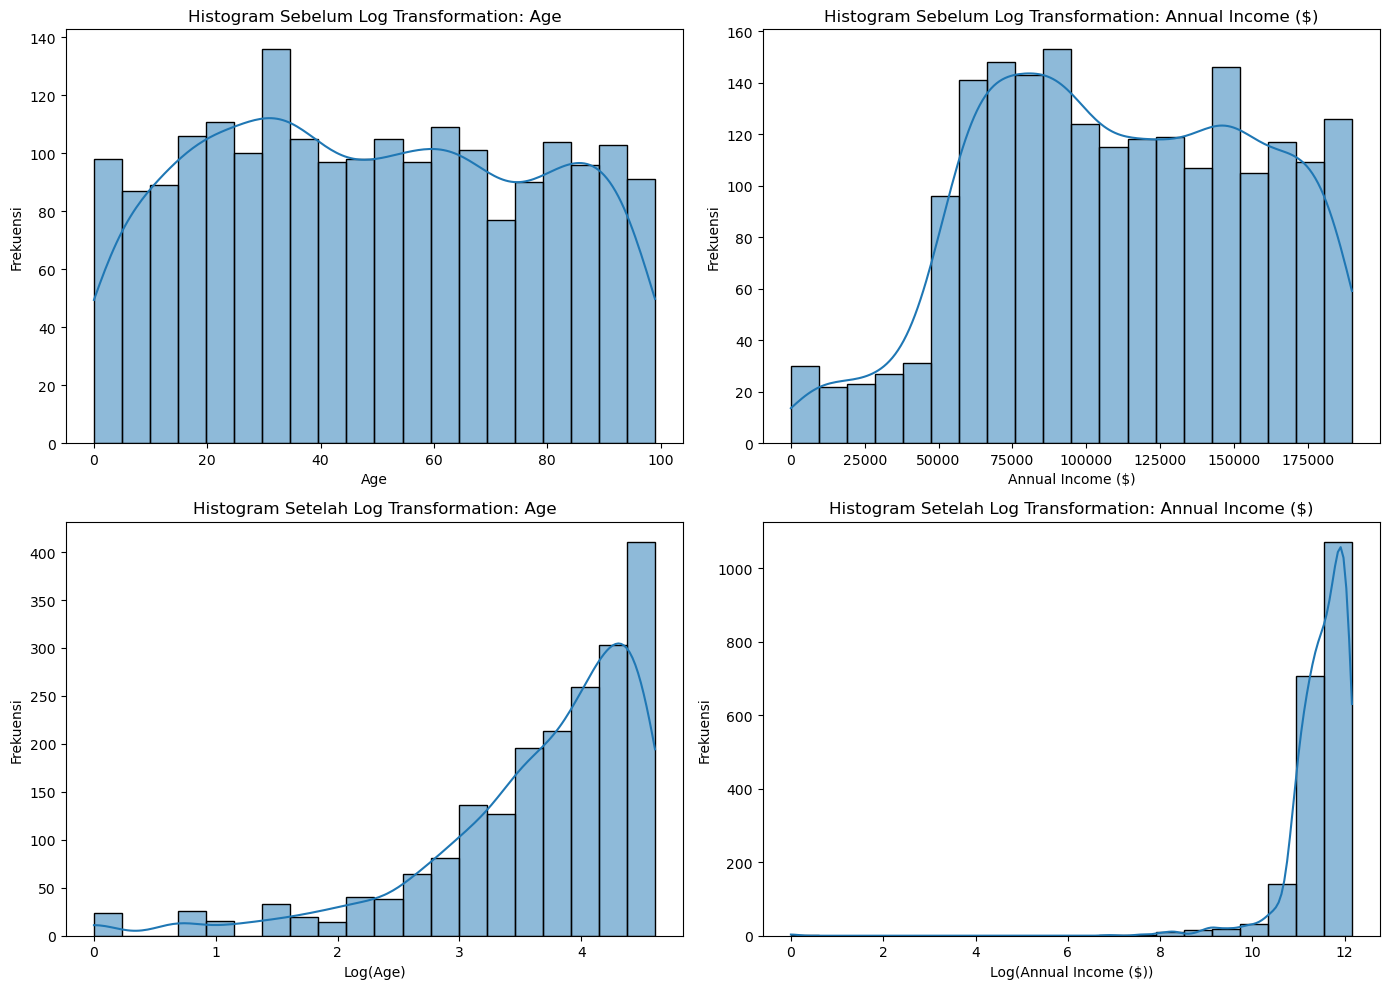

In [19]:
df_log_transformed = df.copy()

for col in var_numerik:
    df_log_transformed[col] = np.log1p(df[col])

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(df[var_numerik[0]], bins=20, kde=True)
plt.title(f'Histogram Sebelum Log Transformation: {var_numerik[0]}')
plt.xlabel(var_numerik[0])
plt.ylabel('Frekuensi')

plt.subplot(2, 2, 2)
sns.histplot(df[var_numerik[1]], bins=20, kde=True)
plt.title(f'Histogram Sebelum Log Transformation: {var_numerik[1]}')
plt.xlabel(var_numerik[1])
plt.ylabel('Frekuensi')

plt.subplot(2, 2, 3)
sns.histplot(df_log_transformed[var_numerik[0]], bins=20, kde=True)
plt.title(f'Histogram Setelah Log Transformation: {var_numerik[0]}')
plt.xlabel(f'Log({var_numerik[0]})')
plt.ylabel('Frekuensi')

plt.subplot(2, 2, 4)
sns.histplot(df_log_transformed[var_numerik[1]], bins=20, kde=True)
plt.title(f'Histogram Setelah Log Transformation: {var_numerik[1]}')
plt.xlabel(f'Log({var_numerik[1]})')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


Setelah model melakukan perhitungan, diketahui bahwa kedua variabel diatas memiliki nilai skewness yang peling tinggi.

Pada variabel age terlihat bahwa distribusi usia cenderung miring ke arah kanan (positively skewed). Artinya, sebagian besar data berasal dari usia yang lebih muda dan hanya sedikit yang berasal dari usia tua. Begitu pula pada variabel Annual Income, histogram juga menunjukkan distribusi yang miring ke kanan. Artinya, sebagian besar individu memiliki pendapatan lebih rendah, dengan sedikit individu yang memiliki pendapatan sangat tinggi.

Berdasarkan visualisasi histogram setelah dilakukan proses transformasi log, metode ini berhasil mengubah distribusi Age dan Annual Income menjadi lebih simetris dan mendekati distribusi normal.

### Penggabungan variabel

Penggabungan variabel dapat menambah informasi baru dalam bentuk variabel tambahan yang akan membantu untuk lebih memahami data.

In [28]:
df['spending_status'] = (df['Spending Score (1-100)'] > 50).astype(int)
df['age_family_dependency'] = df['Age'] / (df['Family Size'] + 1)
df['profession_gender'] = df['Profession'] + '_' + df['Gender']


print(df[['spending_status', 'age_family_dependency', 'profession_gender']].head())

   spending_status  age_family_dependency     profession_gender
0                0               3.800000       Healthcare_Male
1                1               5.250000         Engineer_Male
2                0              10.000000       Engineer_Female
3                1               7.666667         Lawyer_Female
4                0               4.428571  Entertainment_Female


saya melakukan beberapa penggabungan data, diantaranya:

- Mengkategorikan status pengeluaran. Dengan menandai apakah seseorang memiliki skor pengeluaran tinggi atau rendah. Jika skor pengeluarannya lebih dari 50, diberi label sebagai "pengeluaran tinggi" (1), jika tidak, diberi label "pengeluaran rendah" (0).

- Menggabungkan Age dan Family Size untuk menghitung seberapa besar tanggungan keluarga dibandingkan dengan umur pelanggan.

- Menggabungkan profesi dan jenis kelamin menjadi satu kolom, misalnya "Engineer_Male" atau "Lawyer_Female", untuk analisis kelompok berdasarkan kombinasi tersebut.

### Kategorisasi data

In [29]:
# Kategorisasi variabel Age
bins_age = [0, 18, 40, 100]
labels_age = ['Teenager', 'Young Adult', 'Adult']
df['Age Category'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=False)

# Kategorisasi variabel Annual Income
bins_income = [0, 30000, 90000, 150000]
labels_income = ['Low Income', 'Middle Income', 'High Income']
df['Income Category'] = pd.cut(df['Annual Income ($)'], bins=bins_income, labels=labels_income, right=False)

# Kategorisasi variabel Spending Score
bins_spending = [0, 30, 50, 100]
labels_spending = ['Low Spending', 'Average Spending', 'High Spending']
df['Spending Score Category'] = pd.cut(df['Spending Score (1-100)'], bins=bins_spending, labels=labels_spending, right=False)

print(df[['Age', 'Age Category', 'Annual Income ($)', 'Income Category', 'Spending Score (1-100)', 'Spending Score Category']].head())

   Age Age Category  Annual Income ($) Income Category  \
0   19  Young Adult              15000      Low Income   
1   21  Young Adult              35000   Middle Income   
2   20  Young Adult              86000   Middle Income   
3   23  Young Adult              59000   Middle Income   
4   31  Young Adult              38000   Middle Income   

   Spending Score (1-100) Spending Score Category  
0                      39        Average Spending  
1                      81           High Spending  
2                       6            Low Spending  
3                      77           High Spending  
4                      40        Average Spending  


Ada beberapa variabel yang saya kategorikan agar memudahkan dalam proses analisis data nantinya. diantaranya adalah:

1. Mengelompokkan umur ke dalam kategori Teenager, Young Adult, dan Adult berdasarkan rentang umur tertentu.
- Umur 0-17: Teenager (Remaja)
- Umur 18-39: Young Adult (Dewasa Muda)
- Umur 40 ke atas: Adult (Dewasa)

2. Mengkategorikan pendapatan tahunan menjadi tiga kategori: Low Income (Pendapatan Rendah), Middle Income (Pendapatan Menengah), dan High Income (Pendapatan Tinggi).
- Pendapatan 0-29,999: Low Income
- Pendapatan 30,000-89,999: Middle Income
- Pendapatan 90,000 ke atas: High Income

3. Membagi skor pengeluaran menjadi tiga kategori: Low Spending (Pengeluaran Rendah), Average Spending (Pengeluaran Rata-rata), dan High Spending (Pengeluaran Tinggi).
- Skor 0-29: Low Spending
- Skor 30-49: Average Spending
- Skor 50 ke atas: High Spending
